In [56]:
import pandas as pd
import numpy as np
from pandas import DataFrame
from scipy.io import arff
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import skew,norm
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_auc_score, roc_curve,accuracy_score

%matplotlib inline

In [2]:
data = arff.loadarff('4year.arff')

In [3]:
data = pd.DataFrame(data[0])

In [4]:
data.head()
data['class'].value_counts()
data['class'] = data['class'].astype(int)

In [5]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=9,test_size = .2)

# Checking Missing Values

In [7]:
#missing data observing in columns
total = data.isnull().sum(axis=0).sort_values(ascending=False)
percent = ((data.isnull().sum(axis=0)/data.isnull().count(axis=0))).sort_values(ascending=False)

# count the number of null values in the column and their perecentage of the total data
missing_data_columns = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_columns

,Total,Percent
Attr37,4442,0.453636
Attr27,641,0.065462
Attr60,614,0.062704
Attr45,613,0.062602
Attr28,231,0.023591
Attr64,231,0.023591
Attr54,231,0.023591
Attr53,231,0.023591
Attr24,211,0.021548
Attr41,187,0.019097


In [8]:
from sklearn.preprocessing import Imputer
col_name = X_train.columns.values

imp_median = Imputer(missing_values = 'NaN', strategy='median')
X_train_1 = imp_median.fit_transform(X_train[col_name])

X_train = pd.DataFrame(X_train_1)
X_test[col_name] = imp_median.transform(X_test[col_name])

C:\Users\Lenovo\Anaconda2\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Lenovo\Anaconda2\lib\site-packages\pandas\core\frame.py:2356: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
C:\Users\Lenovo\Anaconda2\lib\site-packages\pandas\core\frame.py:2326: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_array(k

# Applying different models 

# Logistic Regression

In [9]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred  = lr.predict_proba(X_test)[:,1]

roc_train = roc_auc_score(y_train, lr.predict_proba(X_train)[:,1])
print('auc_on_test :',roc_auc_score(y_test,y_pred))
print('auc_on_train :',roc_train)
print "f1_score", f1_score(y_test, lr.predict(X_test))
print precision_score(y_test, lr.predict(X_test))
print recall_score(y_test, lr.predict(X_test))
#print roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])
print confusion_matrix(y_test, lr.predict(X_test))


('auc_on_test :', 0.45031518261585735)
('auc_on_train :', 0.4831092590537974)
f1_score 0.017543859649122806
0.08333333333333333
0.00980392156862745
[[1846   11]
 [ 101    1]]


C:\Users\Lenovo\Anaconda2\lib\site-packages\sklearn\linear_model\base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


In [10]:
#LogisticRegression with L1 regularization
lr1 = LogisticRegression(penalty='l1')
lr1.fit(X_train,y_train)
y_pred_lr  = lr1.predict_proba(X_test)[:,1]
roc_train = roc_auc_score(y_train, lr1.predict_proba(X_train)[:,1])
print('auc_on_test :',roc_auc_score(y_test,y_pred_lr))
print('auc_on_train :',roc_train)
print "f1_score", f1_score(y_test, lr1.predict(X_test))
print precision_score(y_test, lr1.predict(X_test))
print recall_score(y_test, lr1.predict(X_test))
#print roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])
print confusion_matrix(y_test, lr1.predict(X_test))



('auc_on_test :', 0.7870484758254406)
('auc_on_train :', 0.7803740300085495)
f1_score 0.036036036036036036
0.2222222222222222
0.0196078431372549
[[1850    7]
 [ 100    2]]


In [11]:
#LogisticRegression with L2 regularization
lr2 = LogisticRegression(penalty='l2')
lr2.fit(X_train,y_train)
y_pred_lr2  = lr2.predict_proba(X_test)[:,1]
roc_train = roc_auc_score(y_train, lr2.predict_proba(X_train)[:,1])
print('auc_on_test :',roc_auc_score(y_test,y_pred_lr2))
print('auc_on_train :',roc_train)

('auc_on_test :', 0.45031518261585735)
('auc_on_train :', 0.4831092590537974)


# DecisionTreeClassifier

In [12]:
dt1 = DecisionTreeClassifier(criterion='gini',random_state=9)
dt1.fit(X_train,y_train)

y_pred_dt1  = dt1.predict_proba(X_test)[:,1]
roc_train = roc_auc_score(y_train, dt1.predict_proba(X_train)[:,1])
print('auc_on_test :',roc_auc_score(y_test,y_pred_dt1))
print('auc_on_train :',roc_train)

('auc_on_test :', 0.7033561405175964)
('auc_on_train :', 1.0)


In [13]:
dt2 = DecisionTreeClassifier(random_state=9,max_depth=4)
dt2.fit(X_train,y_train)

y_pred_dt2  = dt2.predict_proba(X_test)[:,1]
roc_train = roc_auc_score(y_train, dt2.predict_proba(X_train)[:,1])
print('auc_on_test :',roc_auc_score(y_test,y_pred_dt2))
print('auc_on_train :',roc_train)

('auc_on_test :', 0.7632909922181041)
('auc_on_train :', 0.7963130535232961)


In [14]:
dt3 = DecisionTreeClassifier(random_state=9,max_depth=8)
dt3.fit(X_train,y_train)

y_pred_dt3  = dt3.predict_proba(X_test)[:,1]
roc_train = roc_auc_score(y_train, dt3.predict_proba(X_train)[:,1])
print('auc_on_test :',roc_auc_score(y_test,y_pred_dt3))
print('auc_on_train :',roc_train)

('auc_on_test :', 0.783286874254279)
('auc_on_train :', 0.9018228333866326)


In [15]:
dt4 = DecisionTreeClassifier(random_state=9,max_depth=25)
dt4.fit(X_train,y_train)

y_pred_dt4  = dt4.predict_proba(X_test)[:,1]
roc_train = roc_auc_score(y_train, dt4.predict_proba(X_train)[:,1])
print('auc_on_test :',roc_auc_score(y_test,y_pred_dt4))
print('auc_on_train :',roc_train)

('auc_on_test :', 0.7056210206214959)
('auc_on_train :', 0.9999399567949981)


In [16]:
dt4 = DecisionTreeClassifier(criterion='entropy',random_state=9,max_depth=25)
dt4.fit(X_train,y_train)

y_pred_dt4  = dt4.predict_proba(X_test)[:,1]
roc_train = roc_auc_score(y_train, dt4.predict_proba(X_train)[:,1])
print('auc_on_test :',roc_auc_score(y_test,y_pred_dt4))
print('auc_on_train :',roc_train)

('auc_on_test :', 0.7275966929582819)
('auc_on_train :', 1.0)


In [17]:
dt5 = DecisionTreeClassifier(random_state=9,max_depth=5)
dt5.fit(X_train,y_train)

y_pred_dt5  = dt5.predict_proba(X_test)[:,1]
roc_train = roc_auc_score(y_train, dt5.predict_proba(X_train)[:,1])
print('auc_on_test :',roc_auc_score(y_test,y_pred_dt5))
print('auc_on_train :',roc_train)

('auc_on_test :', 0.7832657564910726)
('auc_on_train :', 0.8356361316512535)


In [18]:
dt5 = DecisionTreeClassifier(criterion='entropy',random_state=9,max_depth=5)
dt5.fit(X_train,y_train)

y_pred_dt5  = dt5.predict_proba(X_test)[:,1]
roc_train = roc_auc_score(y_train, dt5.predict_proba(X_train)[:,1])
print('auc_on_test :',roc_auc_score(y_test,y_pred_dt5))
print('auc_on_train :',roc_train)

('auc_on_test :', 0.8128411838618055)
('auc_on_train :', 0.886942234520927)


In [19]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [20]:
# %%time

# param_grid = {"max_depth": [2, 3, 5, 6, 8, 10, 15, 20, 30, 50,100,150,200],
#               "max_leaf_nodes": [2, 3, 4, 5, 10, 15, 20,25,30],
#               "max_features": [4,8,20,25,50,35,45,50,60]}

# # Write your solution here :
# def my_decision_classification(X_train,X_test,y_train,y_test,param_grid):

#     grid_objt = GridSearchCV(estimator = DecisionTreeClassifier(random_state=9),param_grid=param_grid,cv = 5)
#     grid_objt.fit(X_train,y_train)
#     y_pred = grid_objt.predict(X_test)
#     roc_s = roc_auc_score(y_test,y_pred)
#     best_parameters = grid_objt.best_params_
#     return roc_s,best_parameters


# print(my_decision_classification(X_train,X_test,y_train,y_test,param_grid))

In [21]:
# %%time

# param_grid = {"max_depth": [2, 3, 5, 6, 8, 10, 15, 20, 30, 50,100,150,200],
              
#               "max_features": [4,8,20,25,50,35,45,50,60]}

# # Write your solution here :
# def my_decision_classification(X_train,X_test,y_train,y_test,param_grid):

#     grid_objt = GridSearchCV(estimator = DecisionTreeClassifier(random_state=9),param_grid=param_grid,cv = 5)
#     grid_objt.fit(X_train,y_train)
#     y_pred = grid_objt.predict(X_test)
#     roc_s = roc_auc_score(y_test,y_pred)
#     best_parameters = grid_objt.best_params_
#     return roc_s,best_parameters


# print(my_decision_classification(X_train,X_test,y_train,y_test,param_grid))

In [22]:
dt6 = DecisionTreeClassifier(random_state=9,max_depth=6,max_features=60)
dt6.fit(X_train,y_train)

y_pred_dt6  = dt6.predict_proba(X_test)[:,1]
roc_train = roc_auc_score(y_train, dt6.predict_proba(X_train)[:,1])
print('auc_on_test :',roc_auc_score(y_test,y_pred_dt6))
print('auc_on_train :',roc_train)

('auc_on_test :', 0.7859688301815072)
('auc_on_train :', 0.8522447674304771)


In [23]:
dt6 = DecisionTreeClassifier(criterion='entropy',random_state=9,max_depth=6,max_features=60)
dt6.fit(X_train,y_train)

y_pred_dt6  = dt6.predict_proba(X_test)[:,1]
roc_train = roc_auc_score(y_train, dt6.predict_proba(X_train)[:,1])
print('auc_on_test :',roc_auc_score(y_test,y_pred_dt6))
print('auc_on_train :',roc_train)

('auc_on_test :', 0.8169485888054737)
('auc_on_train :', 0.9226540728219652)


In [24]:
dt7 = DecisionTreeClassifier(criterion='entropy',random_state=9,max_depth=6,max_features=60,max_leaf_nodes=50)
dt7.fit(X_train,y_train)

y_pred_dt7  = dt7.predict_proba(X_test)[:,1]
roc_train = roc_auc_score(y_train, dt7.predict_proba(X_train)[:,1])
print('auc_on_test :',roc_auc_score(y_test,y_pred_dt7))
print('auc_on_train :',roc_train)

('auc_on_test :', 0.8221382791134764)
('auc_on_train :', 0.9208676243122769)


In [25]:
dt8 = DecisionTreeClassifier(criterion='entropy',random_state=9,max_depth=6,max_features=30,max_leaf_nodes=50,min_samples_split=15)
dt8.fit(X_train,y_train)

y_pred_dt8  = dt8.predict_proba(X_test)[:,1]
roc_train = roc_auc_score(y_train, dt8.predict_proba(X_train)[:,1])
print('auc_on_test :',roc_auc_score(y_test,y_pred_dt8))
print('auc_on_train :',roc_train)

('auc_on_test :', 0.8309549452521988)
('auc_on_train :', 0.9233383695659267)


In [26]:
# %%time



# param_grid = {"max_depth": [2, 3, 5, 6, 8, 10, 15, 20, 30, 50,100,150,200],
#               "max_leaf_nodes": [2, 3, 4, 5, 10, 15, 20,25,30,40,50,60],
#               "max_features": [4,8,20,25,50,35,45,50,60],
#              "min_samples_split":[15,20,5,8,12,13,17,22,48,40,45,50]}

# # Write your solution here :
# def my_decision_classification(X_train,X_test,y_train,y_test,param_grid):

#     grid_objt = GridSearchCV(estimator = DecisionTreeClassifier(random_state=9,criterion='entropy'),param_grid=param_grid,cv = 5)
#     grid_objt.fit(X_train,y_train)
#     y_pred = grid_objt.predict(X_test)
#     roc_s = roc_auc_score(y_test,y_pred)
#     best_parameters = grid_objt.best_params_
#     return roc_s,best_parameters


# print(my_decision_classification(X_train,X_test,y_train,y_test,param_grid))

In [27]:

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), 
                             n_estimators=200,
                             algorithm="SAMME.R", 
                             learning_rate=0.5, 
                             random_state=42)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.5, n_estimators=200, random_state=42)

In [28]:

y_pred = ada_clf.predict_proba(X_test)[:,1]

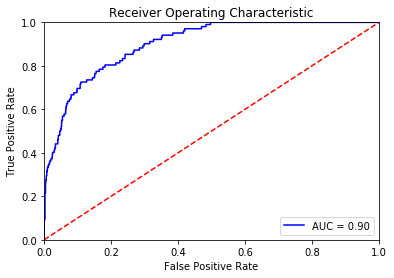

In [29]:
roc = roc_auc_score(y_test,y_pred)
roc

fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.savefig('H:/Greyatom_sessions/hackathon1/ada_roc.png')
plt.show()

In [30]:
y_pred_train = ada_clf.predict_proba(X_train)[:,1]

In [31]:
y_test.value_counts()

0    1857
1     102
Name: class, dtype: int64

In [63]:
roc_train = roc_auc_score(y_train,y_pred_train)
roc_train
print "f1_score", f1_score(y_test, ada_clf.predict(X_test))
print precision_score(y_test, ada_clf.predict(X_test))
print recall_score(y_test, ada_clf.predict(X_test))
print roc_auc_score(y_test, ada_clf.predict_proba(X_test)[:,1])
print confusion_matrix(y_test, ada_clf.predict(X_test))

 f1_score 0.3384615384615385
0.7857142857142857
0.21568627450980393
0.9004323862016534
[[1851    6]
 [  80   22]]


In [35]:
#y_test.value_counts()
#yc.value_counts()

In [34]:
l = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
#l = [0.4,0.5]
#l = [(0.4+(i/100.0)) for i in range(1,10)]
rl1 = []
p = []
#print l

y_pred
for th in l:
    y_pred_class =  [0 if i<th else 1 for i in y_pred]
    yc = pd.Series(y_pred_class)
    print('th=',th)
    #print(yc.head())
    print confusion_matrix(y_test, y_pred_class)
    print('Precision_score :',precision_score(y_test,  y_pred_class))
    print('Recall_Score :',recall_score(y_test, y_pred_class))
    print('-------------')
    rl1.append(recall_score(y_test, y_pred_class))
    p.append(precision_score(y_test,  y_pred_class))
    
   


('th=', 0.1)
[[   0 1857]
 [   0  102]]
('Precision_score :', 0.05206738131699847)
('Recall_Score :', 1.0)
-------------
('th=', 0.2)
[[   0 1857]
 [   0  102]]
('Precision_score :', 0.05206738131699847)
('Recall_Score :', 1.0)
-------------
('th=', 0.3)
[[   0 1857]
 [   0  102]]
('Precision_score :', 0.05206738131699847)
('Recall_Score :', 1.0)
-------------
('th=', 0.4)
[[   0 1857]
 [   0  102]]
('Precision_score :', 0.05206738131699847)
('Recall_Score :', 1.0)
-------------
('th=', 0.5)
[[1851    6]
 [  80   22]]
('Precision_score :', 0.7857142857142857)
('Recall_Score :', 0.21568627450980393)
-------------
('th=', 0.6)
[[1857    0]
 [ 102    0]]
('Precision_score :', 0.0)
('Recall_Score :', 0.0)
-------------
('th=', 0.7)
[[1857    0]
 [ 102    0]]
('Precision_score :', 0.0)
('Recall_Score :', 0.0)
-------------
('th=', 0.8)
[[1857    0]
 [ 102    0]]
('Precision_score :', 0.0)
('Recall_Score :', 0.0)
-------------
('th=', 0.9)
[[1857    0]
 [ 102    0]]
('Precision_score :', 0.0

C:\Users\Lenovo\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_class)
yc.value_counts()
y_test.value_counts()

In [ ]:
len([1 for i, j in zip(y_test, y_pred_class) if i==1 and j == 1])

In [ ]:
print(l)
print(rl1)
print(p)   

In [36]:
#l2 = [(0.4+(i/100.0)) for i in range(1,10)]
l2 = [0.49]
r2 = []
p2 = []
#print l
#y_pred
for th in l2:
    y_pred_class1 =  [0 if i<th else 1 for i in y_pred]
    yc1 = pd.Series(y_pred_class1)
    print('th=',th)
    #print(yc.head())
    print confusion_matrix(y_test, y_pred_class1)
    print('Precision_score :',precision_score(y_test,  y_pred_class1))
    print('Recall_Score :',recall_score(y_test, y_pred_class1))
    print('-------------')
    r2.append(recall_score(y_test, y_pred_class1))
    p2.append(precision_score(y_test,  y_pred_class1))
    
   

('th=', 0.49)
[[1328  529]
 [  12   90]]
('Precision_score :', 0.14539579967689822)
('Recall_Score :', 0.8823529411764706)
-------------


In [ ]:
print(y_test.value_counts())
print(yc1.value_counts())
len([1 for i, j in zip(y_test, y_pred_class1) if i==1 and j == 1])

In [ ]:
print(l2)
print(r2)
print(p2) 

In [ ]:
def plot_roc_curve(fpr, tpr):

    plt.clf()
    plt.plot(fpr, tpr, linewidth=2)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("False Negative Rate")

plot_roc_curve(fpr, tpr)
plt.show()

In [ ]:
print(len(l2), len(r2), len(p2))

In [ ]:
#y_scores=rnd_clf.predict_proba(X_train_scaled)
l = [0.1,0.2,0.3,0.4,0.5,0.8,0.9,1]
from sklearn.metrics import precision_recall_curve
a, b, c = precision_recall_curve(y_test, y_pred)

def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions, 'b--', label='precision')
    plt.plot(thresholds, recalls, 'g--', label = 'recall')
    plt.xlabel('Threshold')
    plt.legend(loc='upper left')
    #plt.ylim([0.1,1.0])
    #plt.xlim([0.3,0.8])
    plt.savefig('H:/Greyatom_sessions/hackathon1/threshold.png')
plot_prec_recall_vs_tresh(p2,r2,l2)
plt.show()

In [ ]:
c.shape
a.shape

In [ ]:
#pp, rl11, l11 = precision_recall_curve(y_test, y_pred)

# def plot_prec_recall_vs_tresh1(precisions, recalls, thresholds):
#     plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
#     plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
#     plt.xlabel('Threshold')
#     plt.legend(loc='upper left')
#     plt.ylim([0.1,1.0])
#     #plt.xlim([0.1,1.0])

# plot_prec_recall_vs_tresh1(pp, rl11, l11)
# plt.show()

In [37]:
# ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), 
#                              n_estimators=200,
#                              algorithm="SAMME.R", 
#                              learning_rate=0.5, 
#                              random_state=42)
# ada_clf.fit(X_train, y_train)
# y_pred = ada_clf.predict_proba(X_test)[:,1]

In [38]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=1.0, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=3, presort='auto', random_state=42,
             subsample=1.0, verbose=0, warm_start=False)

In [64]:
y_predd = gbrt.predict(X_test)
y_predd

array([-0.0059077 ,  0.1142956 ,  0.02601021, ..., -0.0059077 ,
        0.07746601,  0.02601021])

In [53]:
# print "f1_score", f1_score(y_test, gbrt.predict(X_test))
# print precision_score(y_test, gbrt.predict(X_test))
#print recall_score(y_test, gbrt.predict(X_test))
#print roc_auc_score(y_test, gbrt.predict(X_test))
#print confusion_matrix(y_test, gbrt.predict(X_test))

In [65]:
 from sklearn.model_selection import cross_val_score

In [70]:
scores = cross_val_score(ada_clf,X_test,y_test)
scores.mean()
gbrt.score(X_test, y_test) 

0.10216971320900868